In [5]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

# This method applies noise to measurement and gates with prob. p_meas and p_gate, resectively 
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
def create_encoding_circuit(qc):
    qc.cx(0,3)
    qc.cx(0,6)
    for i in range(0, 9, 3):
        qc.h(i)
        qc.cx(i, i+1)
        qc.cx(i, i+2)

    qc.barrier()
    return qc

def introduce_error(qc, qubit, error_type):
    if error_type == 'bit_flip':
        qc.x(qubit)
    elif error_type == 'phase_flip':
        qc.z(qubit)
    elif error_type == 'bit_phase_flip':
        qc.y(qubit)
    qc.barrier()

def syndrome_measurement_1(qc):
    index = 9
    for i in range(0, 9, 3):
        qc.cx(i, index)
        qc.cx(i+1, index)
        qc.cx(i+1, index+1)
        qc.cx(i+2, index+1)
        
        index+=2

    qc.barrier()
    qc.measure(range(9,15),range(9,15))
    qc.barrier()

def error_correction_1(qc):
    index = 0
    for i in range(9, 15, 2):
        qc.ccx(i, i+1, index+1)
        qc.x(i+1)
        qc.ccx(i, i+1, index)
        qc.x(i)
        qc.ccx(i, i+1, index+2)

        index+=3
    
    qc.barrier()
    for i in range(0, 9, 3):
        qc.cx(i, i+2)
        qc.cx(i, i+1)
        qc.h(i)


def syndrome_measurement_2(qc):
    qc.cx(0, 15)
    qc.cx(1, 15)
    qc.cx(1, 16)
    qc.cx(2, 16)

    qc.barrier()
    qc.measure([15, 16], [15, 16])
    qc.barrier()

def error_correction_2(qc):

    qc.ccx(15, 16, 0)
    qc.x(16)
    qc.ccx(15, 16, 3)
    qc.x(15)
    qc.ccx(15, 16, 6)

    qc.barrier()
    
    qc.cx(0, 6)
    qc.cx(0, 3)
    # qc.h(0)

    qc.barrier()
    qc.measure(range(0,9),range(0,9))

## Bit Flip Error

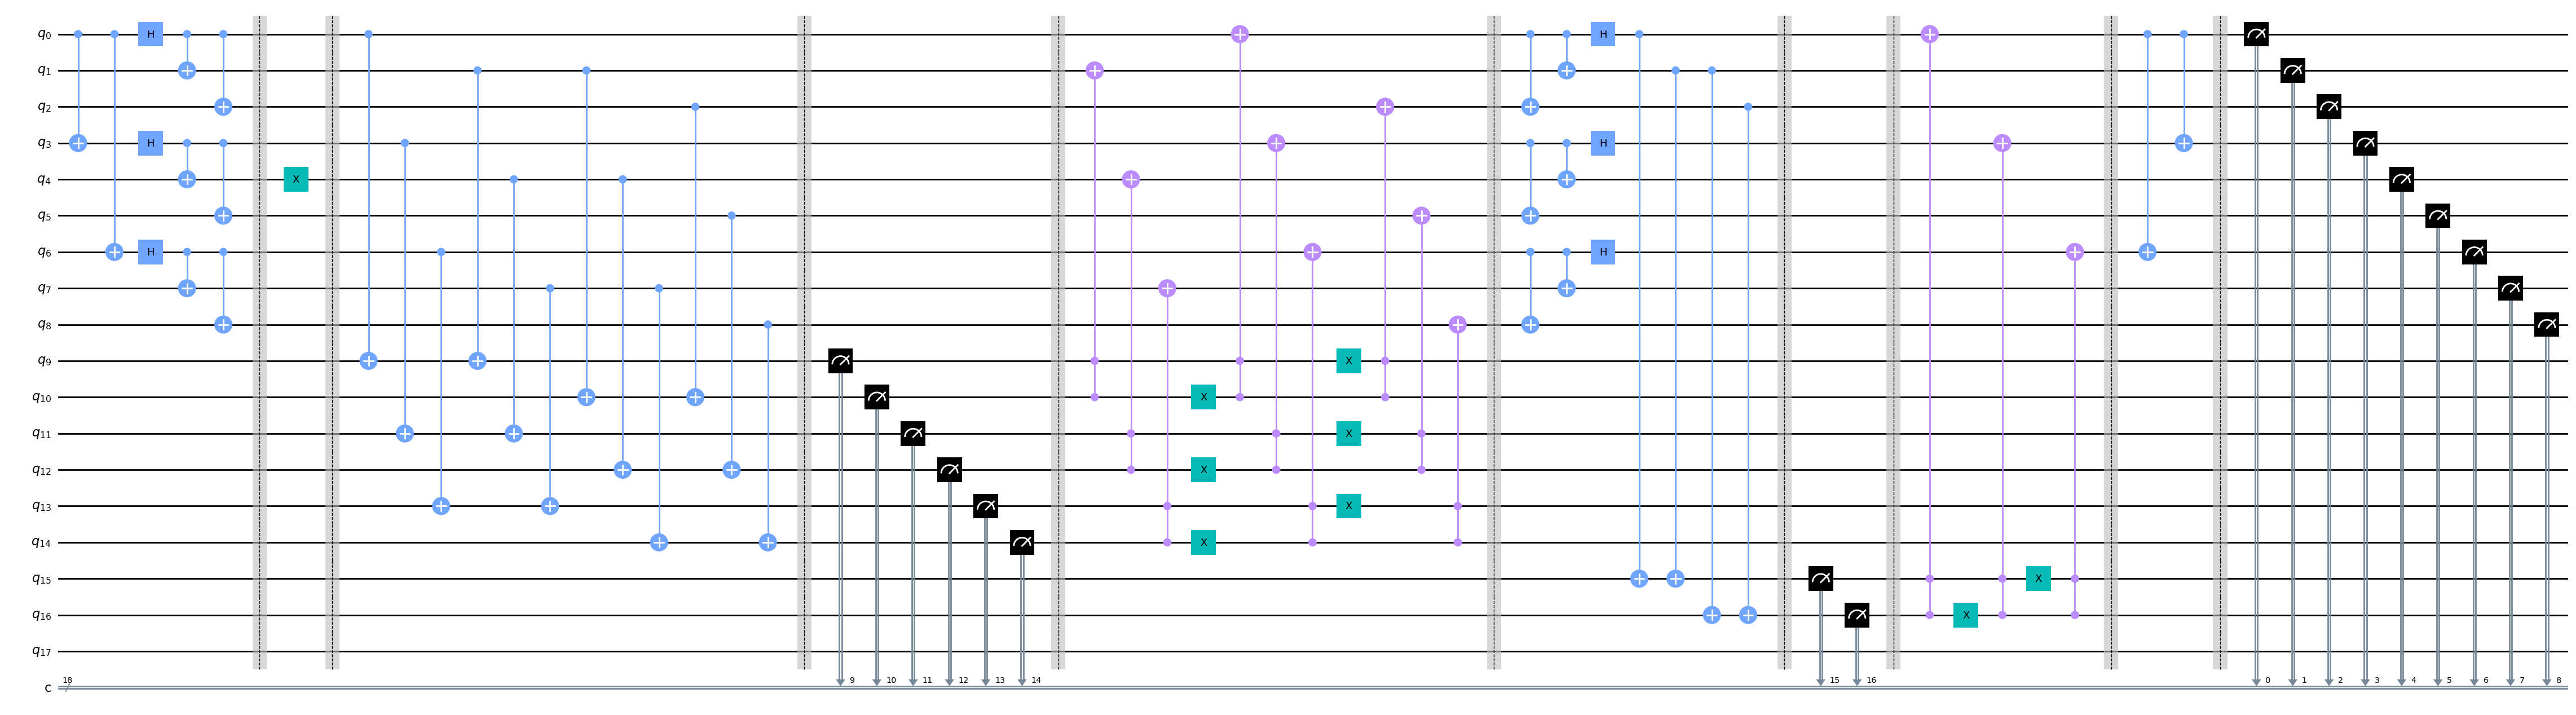

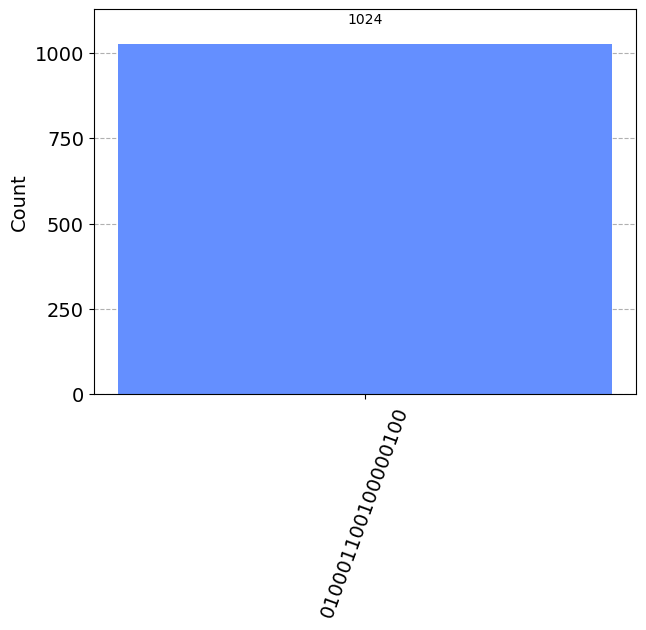

In [36]:
qc = QuantumCircuit(18,18)

create_encoding_circuit(qc)

introduce_error(qc, 4, 'bit_flip')  # Example: Introduce error at qubit 4

syndrome_measurement_1(qc)

error_correction_1(qc)

syndrome_measurement_2(qc)

error_correction_2(qc)

display(qc.draw(output='mpl', fold=-1))


qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()

plot_histogram(counts)



## Phase Flip Error

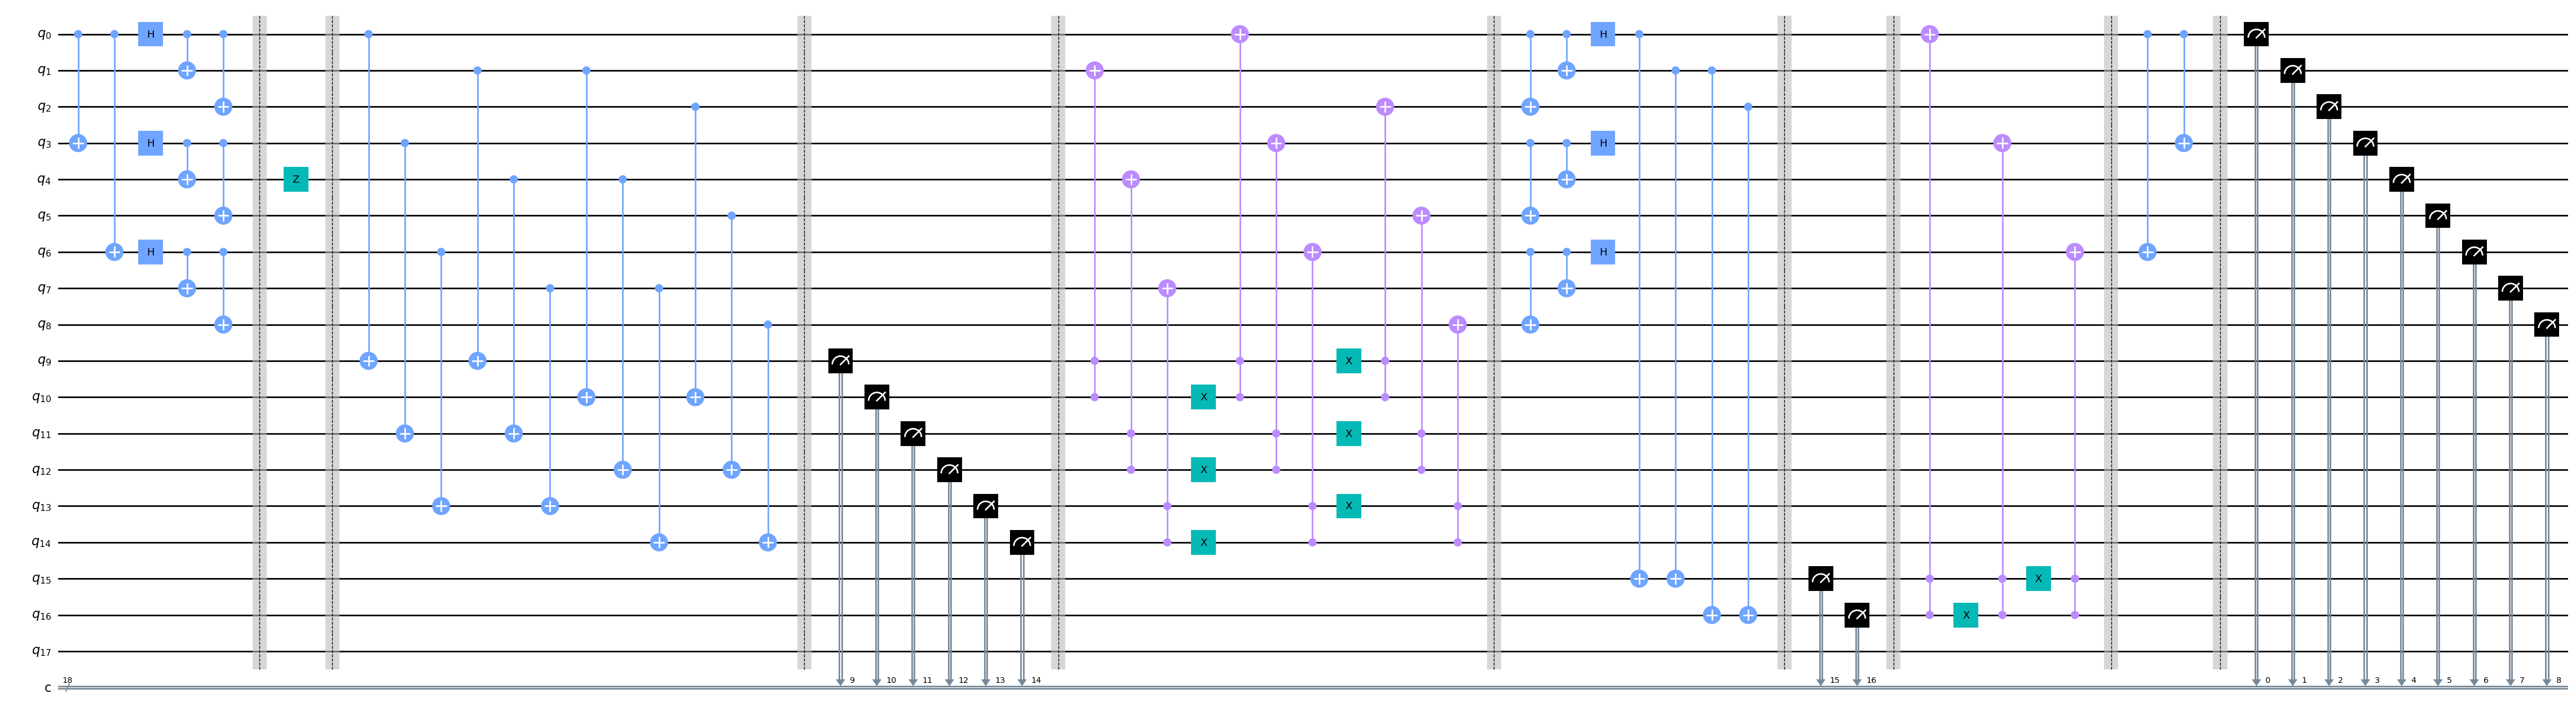

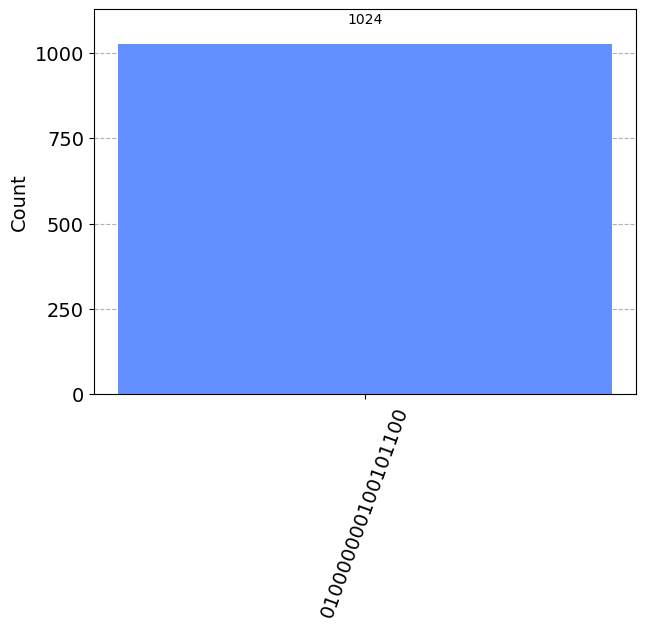

In [37]:
qc = QuantumCircuit(18,18)

create_encoding_circuit(qc)

introduce_error(qc, 4, 'phase_flip')  # Example: Introduce error at qubit 4

syndrome_measurement_1(qc)

error_correction_1(qc)

syndrome_measurement_2(qc)

error_correction_2(qc)

display(qc.draw(output='mpl', fold=-1))


qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()

plot_histogram(counts)



## Bit Phase Flip

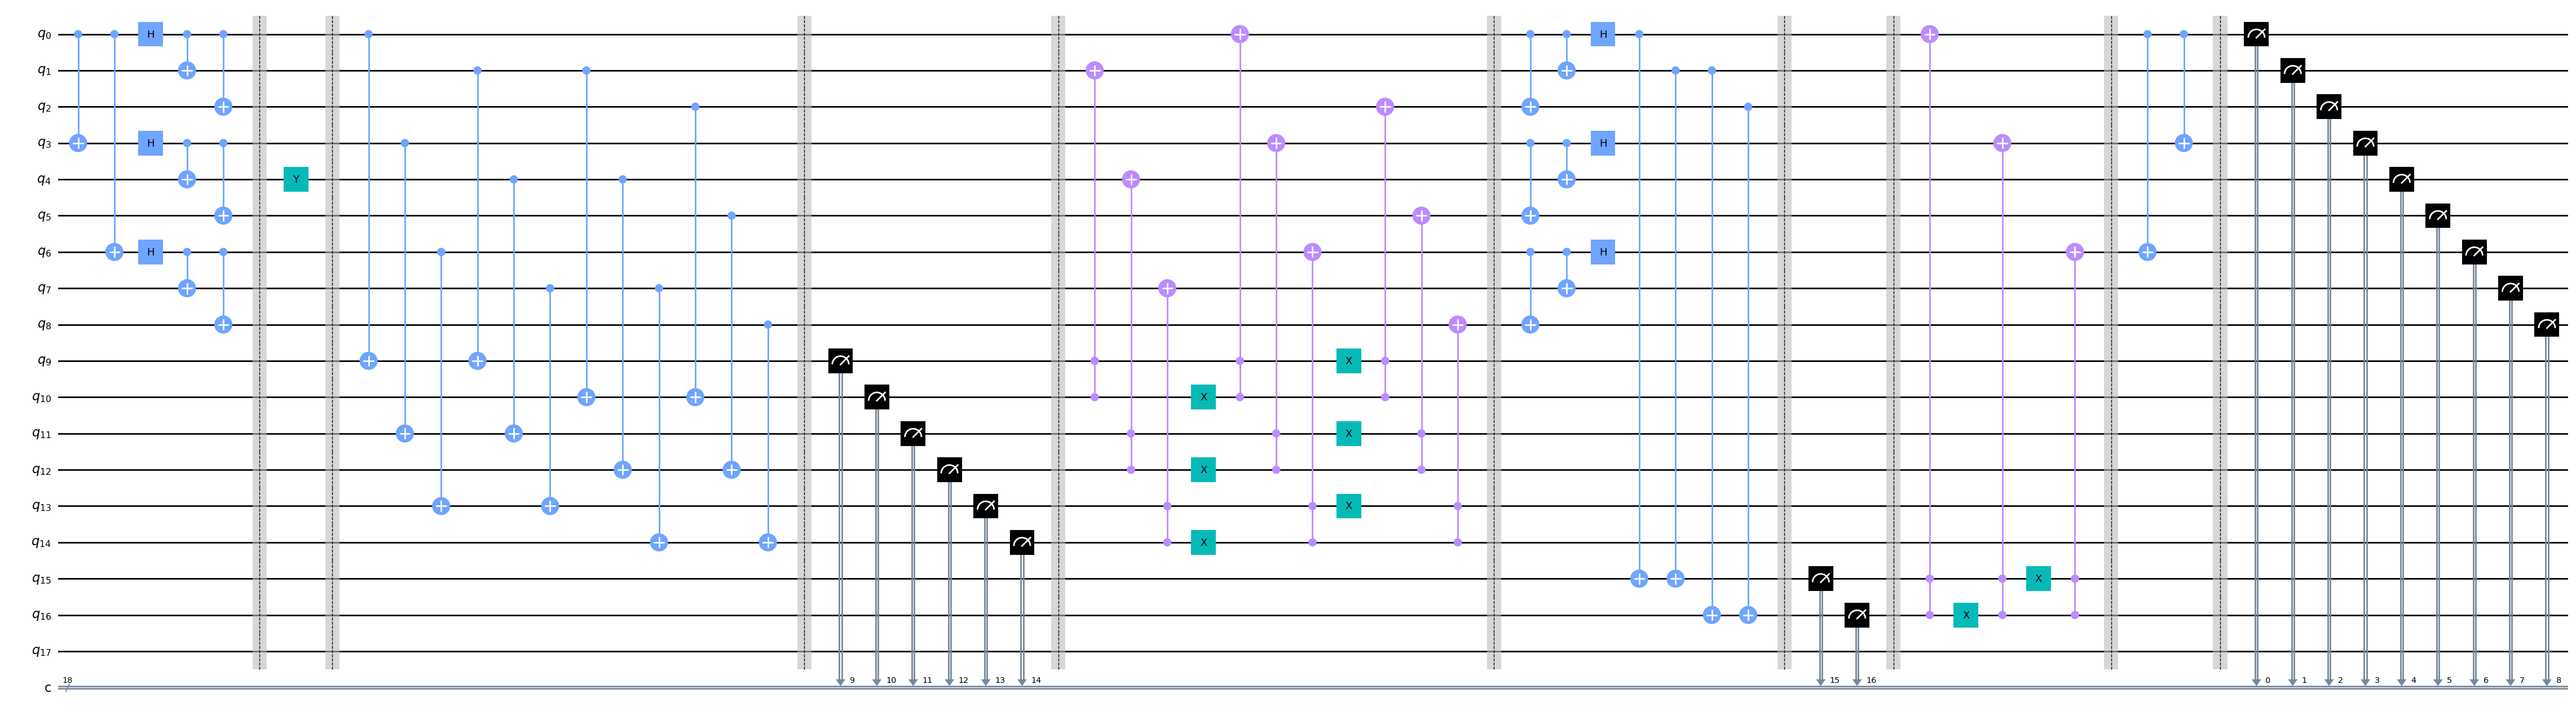

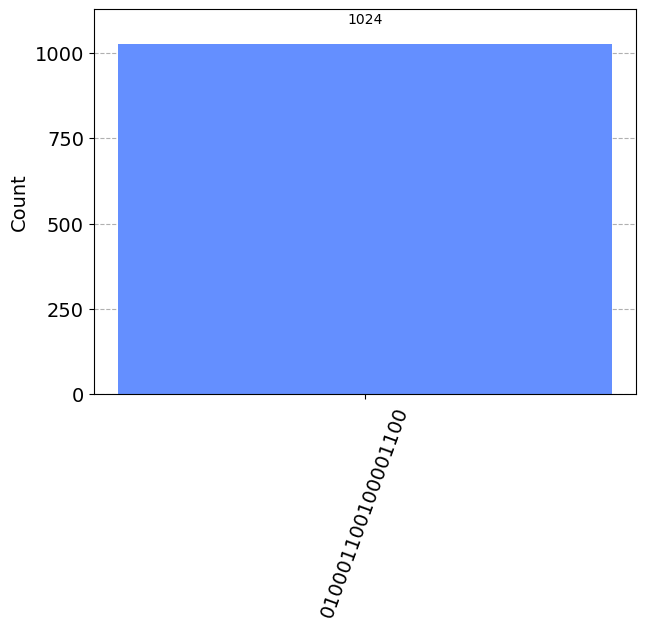

In [38]:
qc = QuantumCircuit(18,18)

create_encoding_circuit(qc)

introduce_error(qc, 4, 'bit_phase_flip')  # Example: Introduce error at qubit 4

syndrome_measurement_1(qc)

error_correction_1(qc)

syndrome_measurement_2(qc)

error_correction_2(qc)

display(qc.draw(output='mpl', fold=-1))


qobj = assemble(qc)
counts = aer_sim.run(qobj).result().get_counts()

plot_histogram(counts)

